# Test Function: Rosenbrock

## Description
The global minimum of the Rosenbrock function is located along a parabolic shaped flat valley bounded by steep canyon walls.

$$
f(x_1, \cdots, x_D) = \sum_{i}^{D-1} [ 100(x_{i+1} - x_i^2)^2 + (1 - x_i)^2]
$$

Global minimum is located at $x^* = f(1, \cdots, 1)$ and $f(x^*) = 0$.

## Classification
* Continuous
* Differentiable
* Non-Separable
* Scalable
* Unimodel

## References

> H. H. Rosenbrock, “An Automatic Method for Finding the Greatest or least Value of a Function,” Computer Journal, vol. 3, no. 3, pp. 175-184, 1960. [Available Online]: http://comjnl.oxfordjournals.org/content/3/3/175.full.pdf

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pyvista as pv

%matplotlib inline

## Test Function and Surface Generation

In [2]:
def rosenbrock(x):
    """
    rosenbrock evaluates Rosenbrock function at vector x

    Parameters
    ----------
    x : array
        x is a D-dimensional vector, [x1, x2, ..., xD]

    Returns
    -------
    float
        scalar result
    """
    D = len(x)
    i, iplus1 = np.arange(0,D-1), np.arange(1,D)
    return np.sum(100*(x[iplus1] - x[i]**2)**2 + (1-x[i])**2)


def surface(fx, start=-30, stop=30, num=60):
    """
    surface evaluates fx at regularly spaced grid of points

    Parameters
    ----------
    fx : func
        fx is a vector valued function that returns a scalar result
    start : float
        lower bound of the coordinate grid
    stop : float
        upper bound of the coordinate grid
    num : int
        number of points along one dimension of the grid

    Returns
    -------
    array
        2D array formed by evaluating fx at each grid point
    """
    x = np.linspace(start=start, stop=stop, num=num)
    x1, x2 = np.meshgrid(x, x, indexing='ij')
    X = np.vstack((x1.ravel(), x2.ravel()))
    z = np.apply_along_axis(fx, 0, X).reshape(num,num)
    return x1, x2, z


x1, x2, z = surface(rosenbrock, start=-1.75, stop=1.75, num=500)
print(np.min(z), np.max(z), np.mean(z), z.shape)

2.5326159508258982e-05 2323.578125 293.60117191913616 (500, 500)


## Normalization Functions

Working with normalized z-values improves the rendered surface. Compute some different variations for trial-and-error use below.

In [3]:
def minmax(z):
    """
    minmax returns the min-max normalized form of z
    """
    return (z-z.min())/(z.max()-z.min())


zminmax = minmax(z)
zlog1p = minmax(np.log1p(z))

## Contour Plots

* Filled contour.
* Log scale.
* Perceptually uniform colormap.

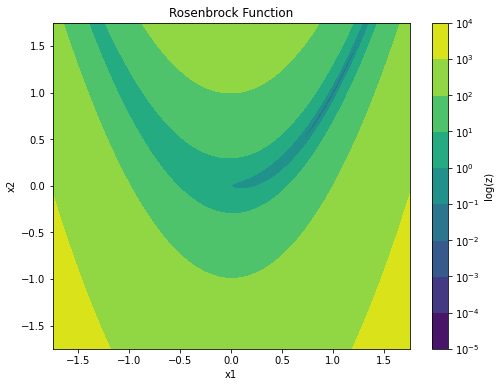

In [4]:
fig = plt.figure(figsize=(8,6))
plt.contourf(x1, x2, z, locator=ticker.LogLocator(), cmap='viridis')
plt.title('Rosenbrock Function')
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar(label='log(z)')
plt.show()

* Contour line.
* Log scale.
* Perceptually uniform colormap.

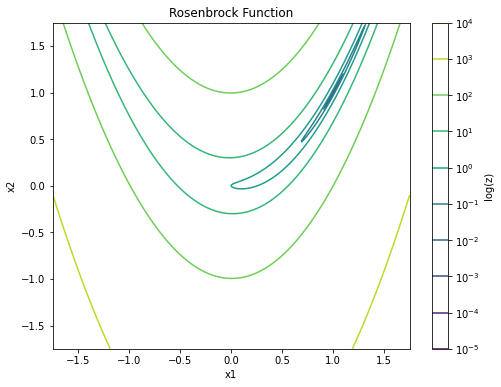

In [5]:
fig = plt.figure(figsize=(8,6))
plt.contour(x1, x2, z, locator=ticker.LogLocator(), cmap='viridis')
plt.title('Rosenbrock Function')
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar(label='log(z)')
plt.show()

## 3D Surface Plots: matplotlib

* Surface plot.
* Full scale.
* Perceptually uniform colormap.

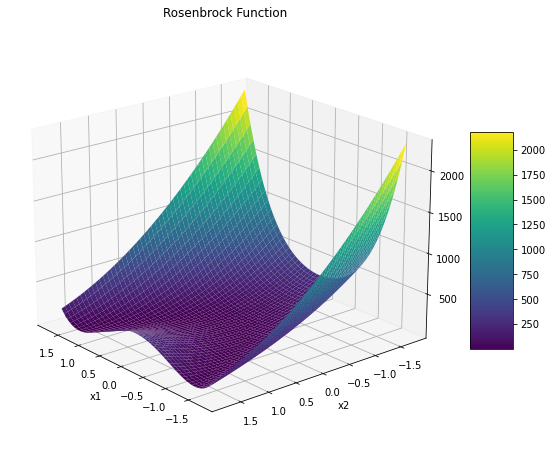

In [6]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection='3d')
ax.view_init(elev=20., azim=140.)
surf = ax.plot_surface(x1, x2, z, cmap='viridis')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Rosenbrock Function')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

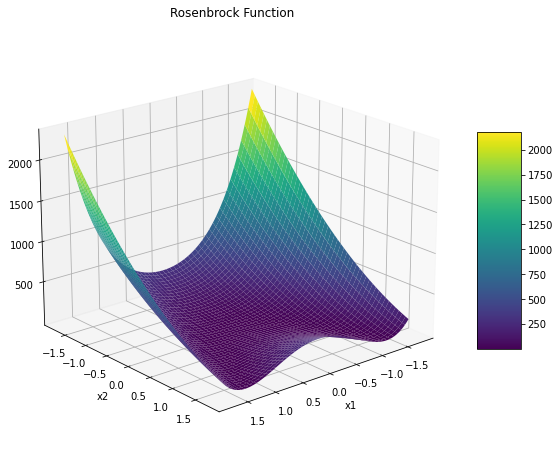

In [7]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection='3d')
ax.view_init(elev=20., azim=50.)
surf = ax.plot_surface(x1, x2, z, cmap='viridis')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Rosenbrock Function')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## 3D Surface Plots: pyvista

Create a surface mesh.
* Plot the z-values of the new mesh by adding an additional attribute named `scalars`.
* Pyvista seems to only work with z-values normalized to range [0,1].

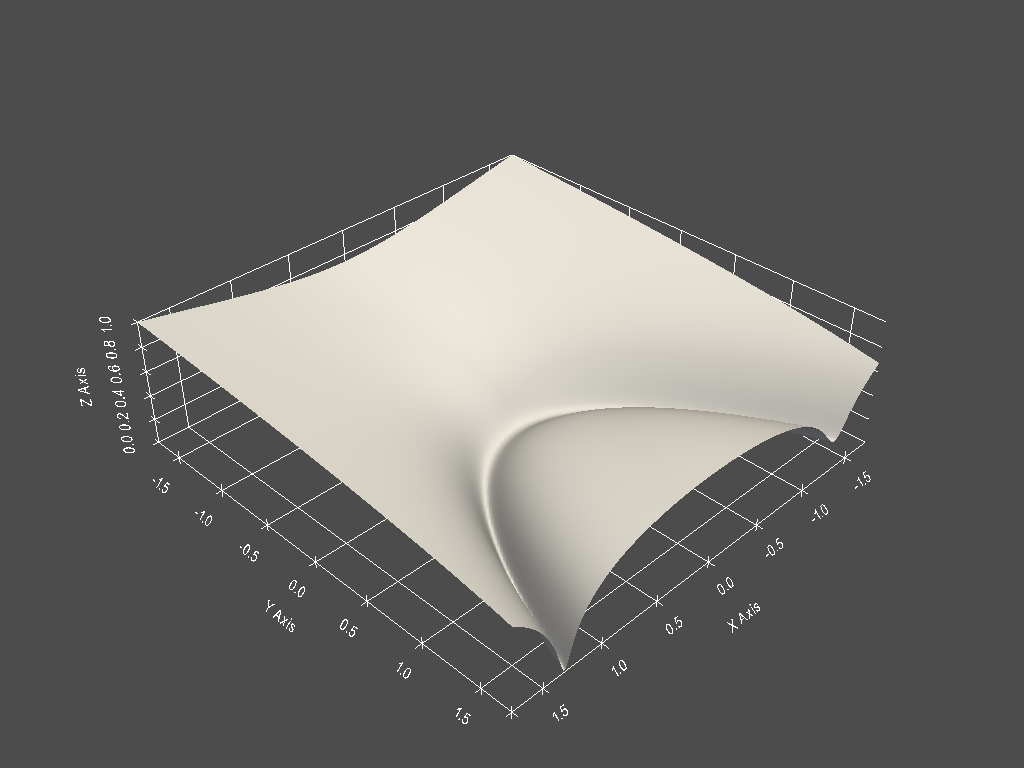

StructuredGrid,Information
N Cells,249001
N Points,250000
X Bounds,"-1.750e+00, 1.750e+00"
Y Bounds,"-1.750e+00, 1.750e+00"
Z Bounds,"0.000e+00, 1.000e+00"
Dimensions,"500, 500, 1"
N Arrays,0


In [8]:
grid = pv.StructuredGrid(x1, x2, zlog1p)
grid.plot(show_grid=True)
grid

In [9]:
grid['scalars'] = zlog1p.flatten("F")
grid

StructuredGrid (0x7f59575ce7c8)
  N Cells:	249001
  N Points:	250000
  X Bounds:	-1.750e+00, 1.750e+00
  Y Bounds:	-1.750e+00, 1.750e+00
  Z Bounds:	0.000e+00, 1.000e+00
  Dimensions:	500, 500, 1
  N Arrays:	1

Repeat the surface plot based on the attached scalars.

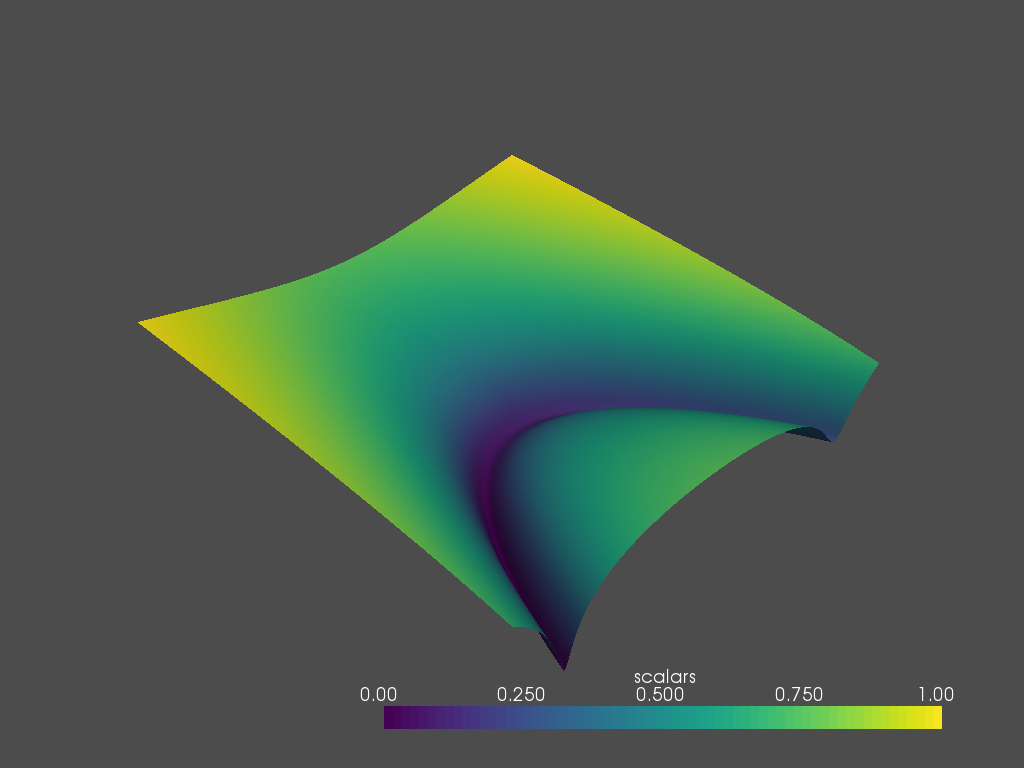

In [10]:
p = pv.Plotter()
p.add_mesh(grid, cmap='viridis')
p.show()

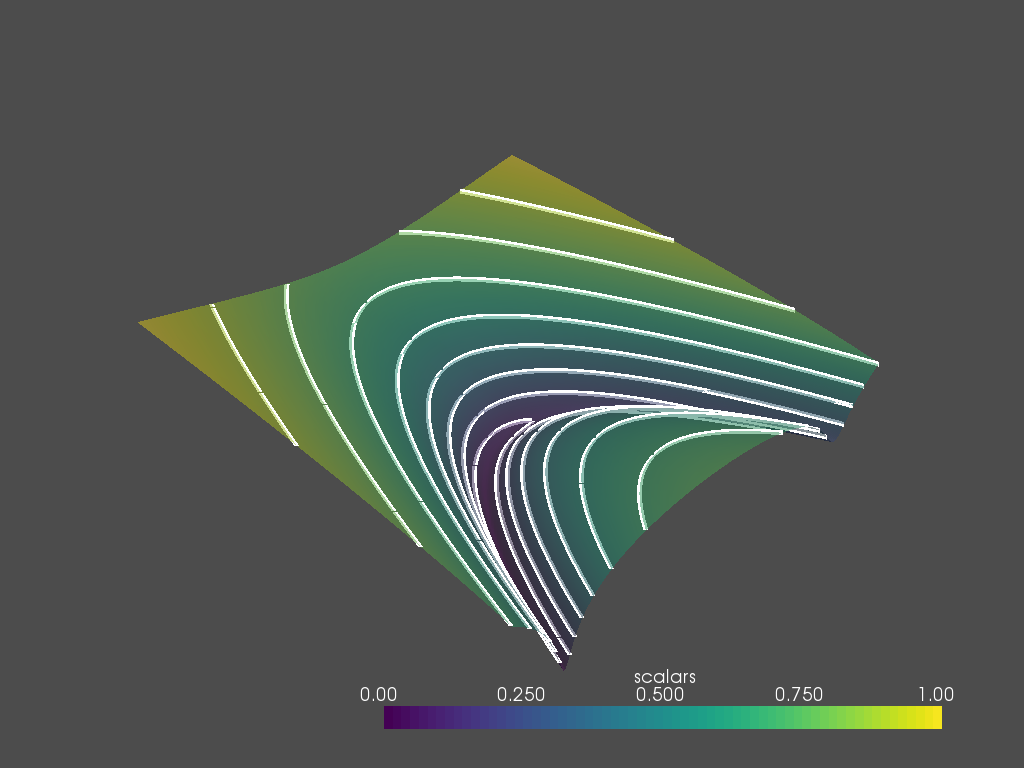

PolyData (0x7f59575177c8)
  N Cells:	11207
  N Points:	11222
  X Bounds:	-1.750e+00, 1.750e+00
  Y Bounds:	-1.750e+00, 1.750e+00
  Z Bounds:	1.111e-01, 8.889e-01
  N Arrays:	1

In [11]:
contours = grid.contour(isosurfaces=10)

p = pv.Plotter()
p.add_mesh(grid, opacity=0.50, cmap='viridis')
p.add_mesh(contours, color="white", line_width=5)
p.show()
contours